In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
import seaborn as sns

In [2]:
df = pd.read_csv('fog_aware_stats_pivot.csv')

df['Label_train'] = 1*(df['Label']=='foggy')

X = np.array(df.drop(['Label', 'Label_train', 'photo', 'site', 'mc_0','mc_1', 'mc_2', 'mc_3', 'dark_channel_prior_0','dark_channel_prior_1','dark_channel_prior_2','dark_channel_prior_3'], axis=1))
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

y = np.array(df['Label_train'])



X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [3]:
df[['Label_train', 'Label']].value_counts()

Label_train  Label    
0            not_foggy    6851
1            foggy        1776
dtype: int64

In [4]:
def plot_confusion_matrix(y_test, y_test_pred, model_name):
  test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
  group_names = ['True Negative (TN)', 'False Positive (FP)',
                'False Negative (FN)', 'True Positive (TP)']
  group_counts = ["{0:0.0f}".format(value) for value in test_confusion_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in test_confusion_matrix.flatten()/np.sum(test_confusion_matrix)]

  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  # Creating the heatmap
  plt.figure(figsize=(10,7))
  sns.heatmap(test_confusion_matrix, annot=labels, fmt='', cmap='Blues')
  plt.title("Confusion Matrix for "+ model_name+ " (using Test Set)")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  plt.show()

In [5]:
# model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)

# scores = cross_val_score(model, X_scaled, y, cv=5)
# print("Cross-Validation Scores:", scores)
# print("Mean CV Score:", scores.mean())

# # Tracking training epochs
# train_scores = []
# test_scores = []

# best_test_score = 0
# patience = 5  # Set the patience for early stopping

# for epoch in range(1, 101):  # Set the number of desired epochs
#     model.fit(X_train, y_train)

#     # Evaluate on training set
#     train_score = model.score(X_train, y_train)
#     train_scores.append(train_score)

#     # Evaluate on test set
#     test_score = model.score(X_test, y_test)
#     test_scores.append(test_score)

#      # Early stopping check
#     if test_score > best_test_score:
#         best_test_score = test_score
#         patience = 5  # Reset patience if there's improvement
#     else:
#         patience -= 1

#     if patience == 0:
#         print(f"Early stopping at epoch {epoch}.")
#         break

#     # Print or log training progress
#     print(f"Epoch {epoch}/{30} - Train Accuracy: {train_score:.4f} - Test Accuracy: {test_score:.4f}")



In [6]:
# # Create a RandomForestClassifier
# model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)

# # Perform cross-validation
# cv_scores = cross_val_score(model, X_scaled, y, cv=5)

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean CV Score:", cv_scores.mean())

In [7]:
# Create a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)

# Perform cross-validation predictions
y_pred_cv = cross_val_predict(model, X_scaled, y, cv=5)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

Accuracy: 0.9281575898030128
Precision: 0.8637316561844863
Recall: 0.7729831144465291
F1 Score: 0.8158415841584159
AUC-ROC Score: 0.9624573846007841


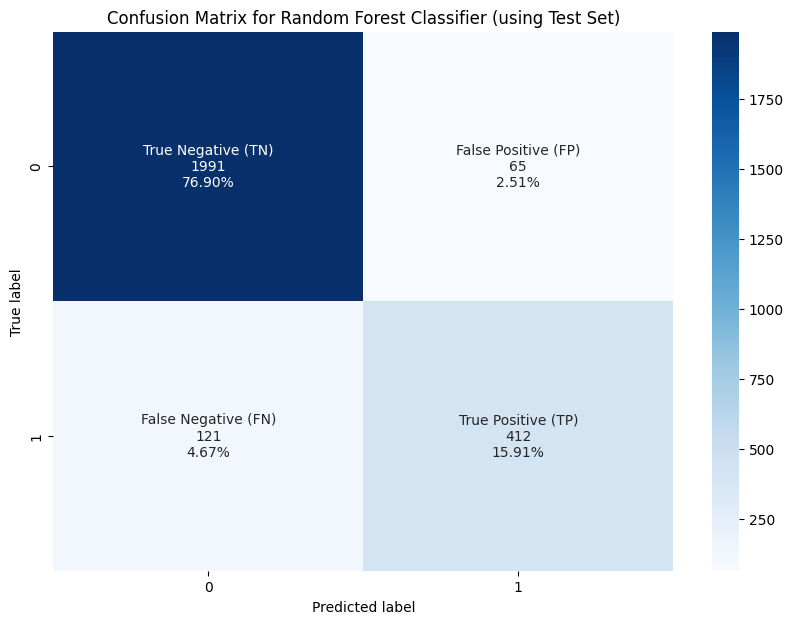

In [8]:
plot_confusion_matrix(y_test,y_pred_test,"Random Forest Classifier")

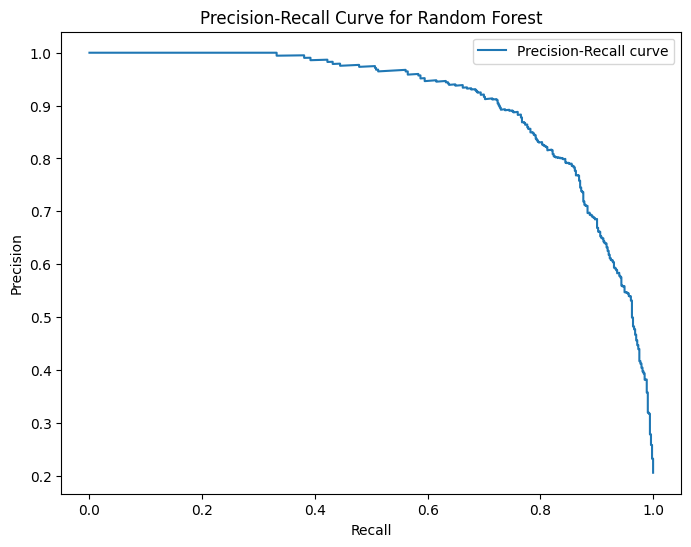

In [9]:
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend()
plt.show()

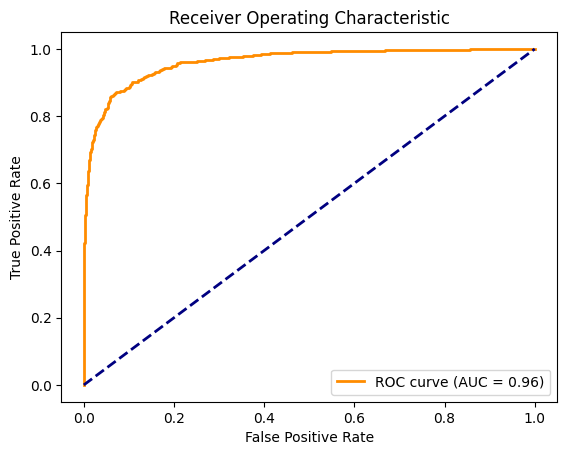

In [10]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [11]:
# # Plotting training progress
# plt.plot(range(1, 101), train_scores, label='Train Accuracy')
# plt.plot(range(1, 101), test_scores, label='Test Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

                    Feature  Importance
13  coef_or_var_sharpness_0    0.009849
21              color_sat_0    0.004789
26                     CF_1    0.003167
15  coef_or_var_sharpness_2    0.002781
14  coef_or_var_sharpness_1    0.002433
9               sharpness_0    0.002433
24              color_sat_3    0.002356
5            vertical_var_0    0.001622
22              color_sat_1    0.001622
25                     CF_0    0.001545
23              color_sat_2    0.001429
27                     CF_2    0.001390
7            vertical_var_2    0.000966
6            vertical_var_1    0.000888
18                entropy_1    0.000734
2                mscn_var_1    0.000695
28                     CF_3    0.000618
8            vertical_var_3    0.000502
1                mscn_var_0    0.000463
11              sharpness_2   -0.000077
16  coef_or_var_sharpness_3   -0.000193
10              sharpness_1   -0.000386
19                entropy_2   -0.000657
17                entropy_0   -0.000695


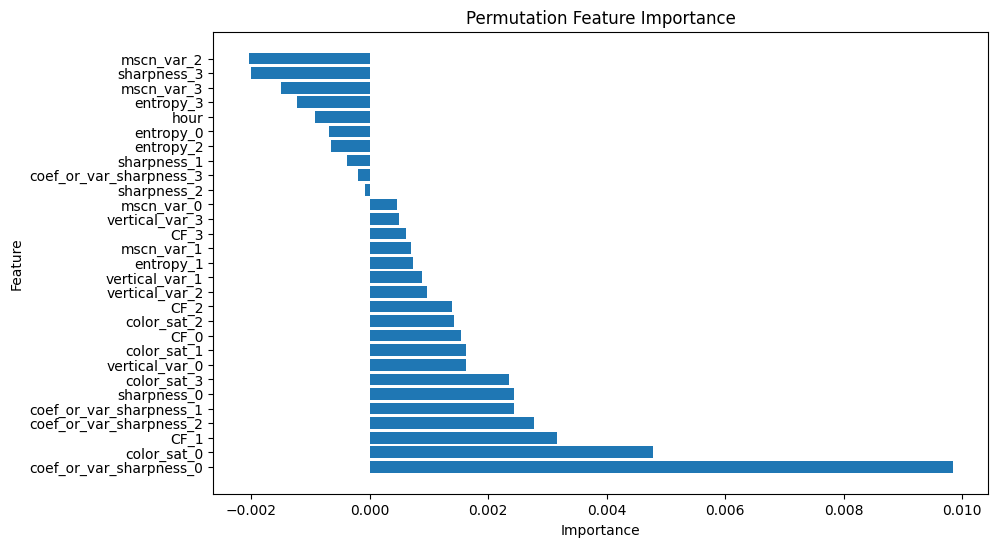

In [12]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importance scores
feature_importance = result.importances_mean

# Making a X_copy dataframe with all the feature columns
X_copy = df.drop(['Label', 'Label_train', 'photo', 'site', 'mc_0','mc_1', 'mc_2', 'mc_3', 'dark_channel_prior_0','dark_channel_prior_1','dark_channel_prior_2','dark_channel_prior_3'], axis=1)

# Get the feature names
feature_names = X_copy.columns

# Create a DataFrame to combine feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.show()

In [13]:
%pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.4 MB/s eta 0:00:00


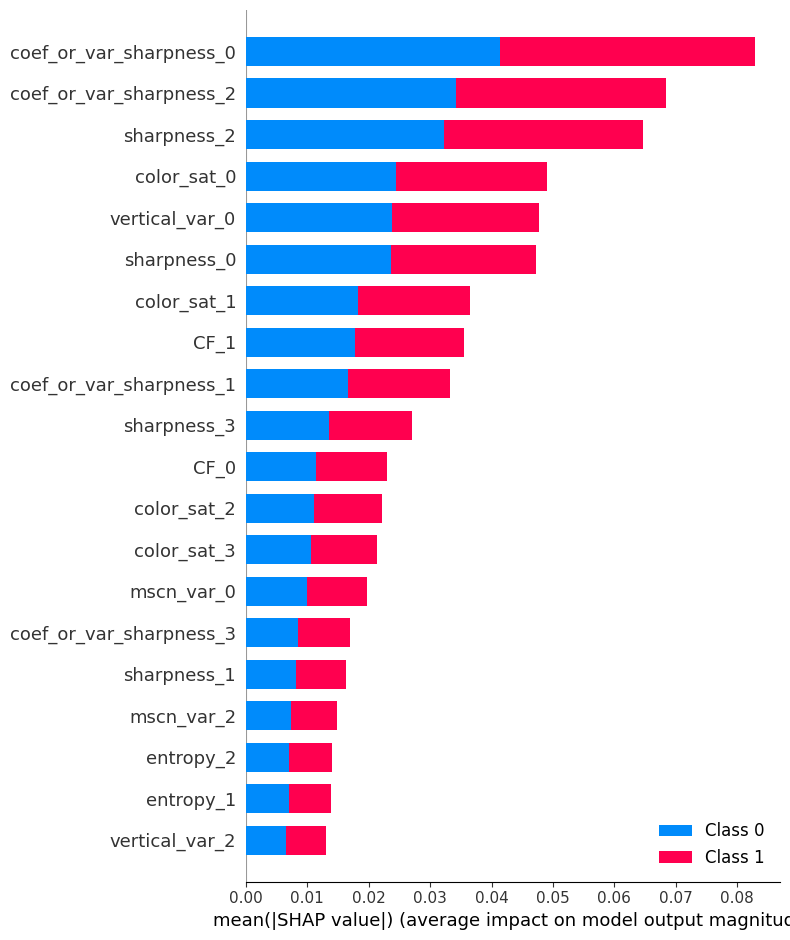

In [14]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_copy)